## Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

pd.options.display.max_columns=25

C:\Users\sbelde3\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_main = pd.read_csv('Electricity_Usage_Data.csv')

In [3]:
data_main[['bill_date']] = data_main[['bill_date']].apply(pd.to_datetime)

In [4]:
data_main.loc[:,'bill_date'] = data_main['bill_date'].apply(lambda x: pd.to_datetime(f'{x.year}-{x.month}-01'))

In [8]:
address_enc = LabelEncoder()
bill_type_enc = LabelEncoder()

data_main['address_enc'] = address_enc.fit_transform(data_main['service_address'])
data_main['bill_type_enc'] = bill_type_enc.fit_transform(data_main['bill_type'])
data_main['year'] = data_main['bill_date'].apply(lambda x:x.year)
data_main['month'] = data_main['bill_date'].apply(lambda x:x.month)

### Clustering - Sunil

Models proposed:

1. KMeans - simple and easy model which is computationally efficient. requires the number of clusters to be specified and can be sensitive to initialization of centroids
2. DBSCAN - can handle arbitrary shapes of clusters and noise points. But this model can be quite computationally expensive for big datasets.
3. Hierarchical - can provide hierarchy of clusters which is useful fpr understanding relationships between the clusters. But this model too is computationally expensive.

Currently still working on clustering.

In [5]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import AgglomerativeClustering

In [9]:
data_main

,esid,business_area,service_address,bill_type,bill_date,total_due,kwh_usage,address_enc,bill_type_enc,year,month
0,1008901000140050014100,2000,10518 BELLAIRE,T,2012-06-01,73232.11,905421.0,249,2,2012,6
1,1008901000140050014100,2000,10518 BELLAIRE,T,2012-05-01,68463.46,824107.0,249,2,2012,5
2,1008901000140050014100,2000,10518 BELLAIRE,T,2012-04-01,80847.87,977744.0,249,2,2012,4
3,1008901000140050014100,2000,10518 BELLAIRE,T,2012-03-01,74373.93,876838.0,249,2,2012,3
4,1008901000140050014100,2000,10518 BELLAIRE,T,2012-02-01,74080.27,872898.0,249,2,2012,2
...,...,...,...,...,...,...,...,...,...,...,...
191248,100890108174510SHE8207,2800,1 STREET LIGHT WAY (VARIOUS),T,2014-01-01,652.62,2544.0,0,2,2014,1
191249,100890108174510SHE8207,2800,1 STREET LIGHT WAY (VARIOUS),T,2013-12-01,1849.17,2544.0,0,2,2013,12
191250,100890108174510SHE8207,2800,1 STREET LIGHT WAY (VARIOUS),T,2013-09-01,599.33,2544.0,0,2,2013,9
191251,100890108174510SHE8207,2800,1 STREET LIGHT WAY (VARIOUS),T,2013-08-01,603.48,2544.0,0,2,2013,8


In [10]:
X = data_main[[
    'business_area', 
    'address_enc', 
    'bill_type_enc', 
    'year', 
    'month',
    'kwh_usage',
]]

In [11]:
X.dtypes

business_area      int64
address_enc        int32
bill_type_enc      int32
year               int64
month              int64
kwh_usage        float64
dtype: object

In [13]:
kmeans = KMeans(n_clusters=20, random_state=0).fit(X)
print("Value Counts of Cluster obtained from kmeans : ",pd.Series(kmeans.labels_).value_counts())

Value Counts of Cluster obtained from kmeans :  0     176516
14      7821
7       2809
5       1053
18      1018
19       653
3        265
13       265
6        258
15       165
2        131
11       127
4         51
8         40
17        22
1         20
9         13
12        11
16         9
10         6
dtype: int64


Text(0.5, 1.0, 'Clusters determined by DBSCAN')

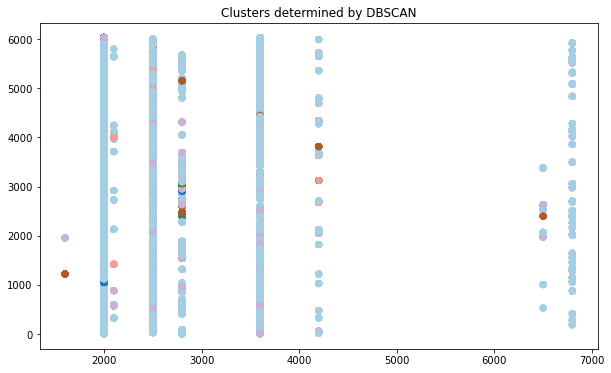

In [15]:
y_pred = kmeans.labels_
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters determined by DBSCAN")

Number of Clusters Obtained from Kmeans :  3


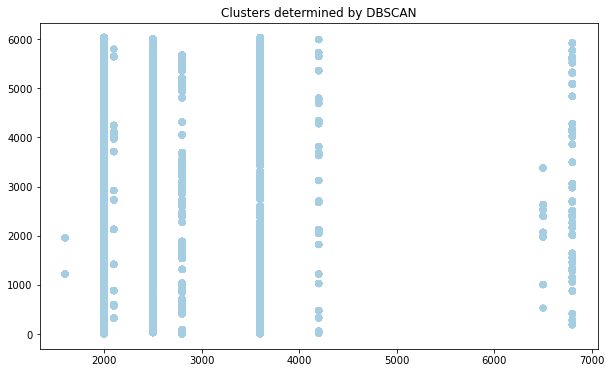

In [22]:
db = DBSCAN(eps=0.4, min_samples=3)
db.fit(X)

y_pred = db.fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters determined by DBSCAN")
print("Number of Clusters Obtained from Kmeans : ",len(set(y_pred)))

## Agglomerative Clustering

In [18]:
for k in range(1, 11):
    agg_cluster = AgglomerativeClustering(
        n_clusters=k, 
        affinity='euclidean', 
        linkage='single'
    )
    agg_cluster.fit(X)
    break

In [ ]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

In [ ]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()